In [1]:
import pyrealsense2 as rs
from collections import deque
import numpy as np
import cv2
from Image_Handler import Image_Handler
import sys
sys.path.append('../')
from Hardware.mainboard import *
from Hardware.Motor import *
from time import sleep
import threading
import ctypes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pipeline = rs.pipeline(rs.context())
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

pipeline.start(config)

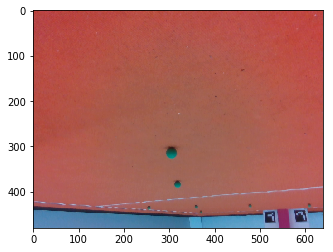

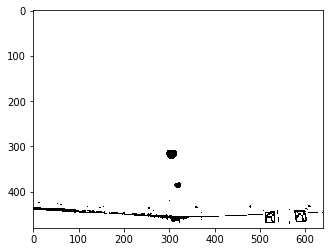

In [3]:
greenLower = (25,0,56)
greenUpper = (150,255,146)
frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
color_frame = frames.get_color_frame()
color_image = np.asanyarray(color_frame.get_data())
hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
nmask = cv2.GaussianBlur(mask,(9,9),2,2)
plt.imshow(cv2.cvtColor(color_image,cv2.COLOR_BGR2RGB),cmap='binary')
plt.figure()
plt.imshow(mask,cmap='binary')
circles = cv2.HoughCircles(nmask, cv2.HOUGH_GRADIENT, 1.2, 1)
circles

In [5]:
color_frame

In [6]:
blurred = cv2.GaussianBlur(color_image, (11, 11), 0)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=1)
mask = cv2.dilate(mask, None, iterations=1)

# find contours in the mask and initialize the current
# (x, y) center of the ball
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None
lenq = 10 # Maximum number of center points stored in memory

pts = deque(maxlen=lenq)


In [16]:
print([cnts[i].shape for i in range(len(cnts))])

[(12, 1, 2), (4, 1, 2), (8, 1, 2), (4, 1, 2), (8, 1, 2), (36, 1, 2), (38, 1, 2), (4, 1, 2), (118, 1, 2), (10, 1, 2), (28, 1, 2)]


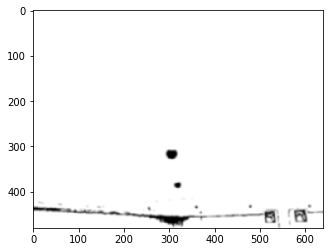

In [23]:
plt.imshow(nmask,cmap='binary')